<a href="https://colab.research.google.com/github/biazetto/projetoIA/blob/main/ProjetoIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# pacotes usados neste notebook
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [6]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

# Árvore de decisão

## 1. Explorando o Dataset

In [7]:
# Alterar aq o arquivo
df = pd.read_csv('/content/sample_data/fuma.csv', sep=',')


In [8]:
df

,Fuma,Atividade,Peso,Condicao
0,1,1,72,Normal
1,1,0,75,Doente
2,0,1,78,Normal
3,0,0,78,Doente
4,0,1,84,Normal
5,1,1,84,Doente
6,0,1,85,Doente
7,0,0,98,Atencao
8,1,0,120,Atencao


In [9]:
# Há elementos nulos?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fuma       9 non-null      int64 
 1   Atividade  9 non-null      int64 
 2   Peso       9 non-null      int64 
 3   Condicao   9 non-null      object
dtypes: int64(3), object(1)
memory usage: 416.0+ bytes


In [10]:
df.shape

(9, 4)

### 2.1. Extraindo as variáveis independentes (X) e dependente (y)

In [11]:
df.columns

Index(['Fuma', 'Atividade', 'Peso', 'Condicao'], dtype='object')

In [12]:
X = df[['Fuma', 'Atividade', 'Peso']]

In [13]:
y = df['Condicao']
y

0     Normal
1     Doente
2     Normal
3     Doente
4     Normal
5     Doente
6     Doente
7    Atencao
8    Atencao
Name: Condicao, dtype: object

In [14]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=4)

In [15]:
clf = clf.fit(X,y)

In [16]:
y_pred = clf.predict(X)
y_pred

array(['Normal', 'Doente', 'Normal', 'Doente', 'Doente', 'Doente',
       'Doente', 'Atencao', 'Atencao'], dtype=object)

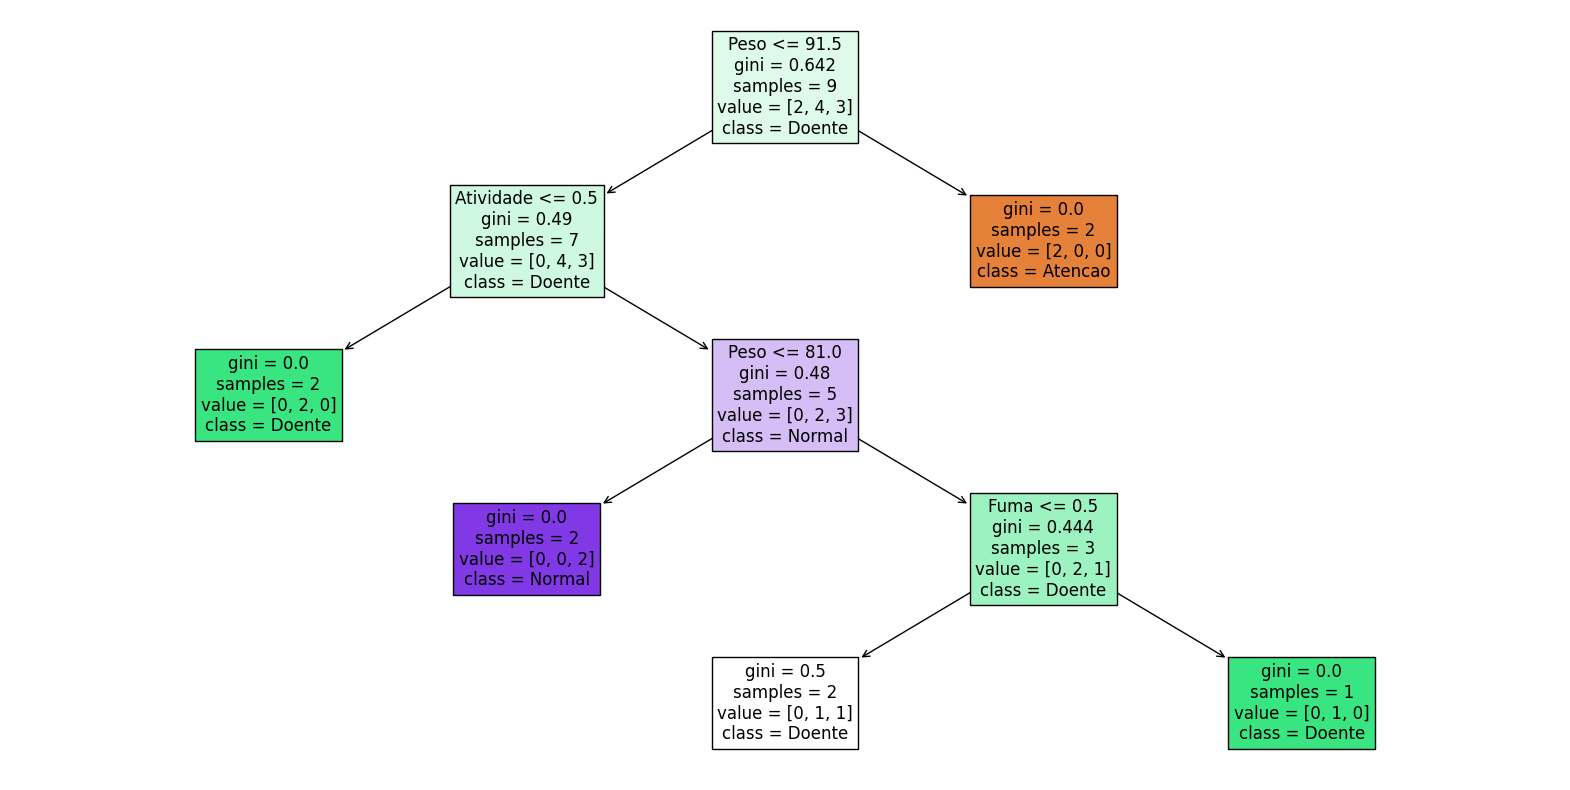

In [17]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,10))
a = plot_tree(clf, feature_names=X.columns, fontsize=12, filled=True, class_names=['Atencao', 'Doente', 'Normal'])